# Importing Necessary Libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the Excel file

In [85]:
df=pd.read_excel(r'D:\Christ\Python\Assignment\data.xlsx',parse_dates=['Week_Ending'],thousands=',',decimal='.')
df

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
0,Brand A,2022-02-05,FY_2022,MAT_2022,5.549708e+07,0.039253,0.015600,0,29882443.5,1070.8565,17.716258,534418.5,46008.276537,2662747.5,11599332.5,8.152210e+05,280464068.5,3.861346e+06,6779.5,671.943906
1,Brand A,2022-02-12,FY_2022,MAT_2022,5.773779e+07,0.037425,0.014623,0,29719511.5,1070.8565,17.720041,631368.5,54354.736119,2609978.0,13142160.5,9.236536e+05,235058652.5,3.236218e+06,5110.0,506.472949
2,Brand A,2022-02-19,FY_2022,MAT_2022,5.404445e+07,0.061313,0.010034,0,29353173.5,1070.8565,17.774548,638092.0,54933.564597,2401283.5,12949660.5,9.101243e+05,257480818.0,3.544920e+06,2842.0,281.682216
3,Brand A,2022-02-26,FY_2022,MAT_2022,5.577581e+07,0.066293,0.023455,0,29324354.5,1070.8565,17.771519,538643.0,46371.965227,2396597.0,12401567.5,8.716034e+05,276892035.0,3.812168e+06,3031.0,300.414777
4,Brand A,2022-03-05,FY_2022,MAT_2022,5.839206e+07,0.047306,0.015688,0,29192688.0,1282.7465,17.842527,639628.5,55065.842423,2427106.5,8857677.5,6.225327e+05,193081850.5,2.658294e+06,3395.0,336.492302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Brand A,2024-05-04,FY_2024,MAT_2024,4.329954e+07,0.072005,0.048122,0,24330285.0,1128.5190,18.646429,422376.5,36362.541369,1557787.0,17464296.5,1.227421e+06,99109724.0,1.364513e+06,0.0,0.000000
118,Brand A,2024-05-11,FY_2024,MAT_2024,4.231364e+07,0.052595,0.342303,0,24294714.5,1123.4335,18.697309,273955.5,23584.925302,1554808.5,11039213.5,7.758548e+05,94435820.5,1.300164e+06,0.0,0.000000
119,Brand A,2024-05-18,FY_2024,MAT_2024,4.011042e+07,0.051634,0.136933,0,24298113.0,1123.4335,18.695423,289660.0,24936.931228,1517523.0,10867983.0,7.638205e+05,90986511.0,1.252675e+06,0.0,0.000000
120,Brand A,2024-05-25,FY_2024,MAT_2024,3.783654e+07,0.058609,0.137453,0,24399693.5,1123.4335,18.709714,237674.5,20461.481258,1427023.5,10679399.5,7.505665e+05,97938928.5,1.348394e+06,0.0,0.000000


# Data Exploration

In [86]:
print(f'The shape of the data is {df.shape}')
print(f'The size of the data is {df.size}')
print(f'The columns of the data are {df.columns}')

The shape of the data is (122, 20)
The size of the data is 2440
The columns of the data are Index(['Department', 'Week_Ending', 'Year', 'MAT', 'Sales', 'Discount1',
       'Discount2', 'Holiday Dummy', 'Total SKU', 'Gasoline Price',
       'Average Price', 'Email Clicks', 'Email Spends',
       'Organic Search Impressions', 'Modular Video Impressions',
       'Modular Video Spends', 'Paid Social Impressions', 'Paid Social Spends',
       'Paid Search Impressions', 'Paid Search Spends'],
      dtype='object')


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Department                  122 non-null    object        
 1   Week_Ending                 122 non-null    datetime64[ns]
 2   Year                        122 non-null    object        
 3   MAT                         122 non-null    object        
 4   Sales                       122 non-null    float64       
 5   Discount1                   122 non-null    float64       
 6   Discount2                   122 non-null    float64       
 7   Holiday Dummy               122 non-null    int64         
 8   Total SKU                   122 non-null    float64       
 9   Gasoline Price              122 non-null    float64       
 10  Average Price               122 non-null    float64       
 11  Email Clicks                122 non-null    float64       

In [88]:
df.describe(include='float64')

,Sales,Discount1,Discount2,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
count,1.220000e+02,122.000000,122.000000,1.220000e+02,122.000000,122.000000,1.220000e+02,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,122.000000,122.000000
mean,4.716817e+07,0.045865,0.048454,2.733039e+07,1141.034570,18.232506,4.383132e+05,37734.537898,1.973459e+06,1.342260e+07,9.433634e+05,2.028083e+08,2.792205e+06,1522.872951,150.938152
std,4.904374e+06,0.020532,0.066932,1.986457e+06,128.779133,0.235631,1.746694e+05,15037.350764,3.844069e+05,6.033649e+06,4.240552e+05,7.892941e+07,1.086677e+06,2051.580642,203.340528
min,3.158512e+07,0.013620,0.002513,2.377588e+07,966.010500,17.716258,1.655045e+05,14248.340587,8.734215e+05,1.924108e+06,1.352296e+05,6.940367e+07,9.555292e+05,0.000000,0.000000
25%,4.444759e+07,0.032922,0.007754,2.590976e+07,1051.745625,18.051530,3.169416e+05,27285.615915,1.708429e+06,9.235256e+06,6.490696e+05,1.399515e+08,1.926810e+06,0.000000,0.000000
50%,4.692418e+07,0.041603,0.017871,2.687210e+07,1114.687000,18.210772,4.256770e+05,36646.682574,1.943811e+06,1.191968e+07,8.377356e+05,1.858422e+08,2.558620e+06,490.000000,48.565899
75%,5.047277e+07,0.057146,0.057452,2.925184e+07,1186.125500,18.414389,5.104199e+05,43942.226474,2.220258e+06,1.749417e+07,1.229520e+06,2.727134e+08,3.754638e+06,2648.625000,262.516030
max,5.839206e+07,0.178189,0.342303,3.109905e+07,1505.497000,18.709714,1.254225e+06,107976.671165,3.125528e+06,3.799969e+07,2.670683e+06,3.689925e+08,5.080180e+06,10363.500000,1027.168769


In [89]:
df.describe(include='object')

,Department,Year,MAT
count,122,122,122
unique,1,3,3
top,Brand A,FY_2023,MAT_2023
freq,122,53,52


In [90]:
# There are missing values in the columns like paid Search Impressions,paid Search Spends
df.isnull().sum()

Department                    0
Week_Ending                   0
Year                          0
MAT                           0
Sales                         0
Discount1                     0
Discount2                     0
Holiday Dummy                 0
Total SKU                     0
Gasoline Price                0
Average Price                 0
Email Clicks                  0
Email Spends                  0
Organic Search Impressions    0
Modular Video Impressions     0
Modular Video Spends          0
Paid Social Impressions       0
Paid Social Spends            0
Paid Search Impressions       0
Paid Search Spends            0
dtype: int64

In [91]:
# There are no duplicate values in the dataset.
df.duplicated().sum()

0

# Data Cleaning

* In marketing mix modeling, the missing values in the Paid Search Impressions and Paid Search Spends columns indicate that there was no activity for those weeks (rather than a data collection error), the appropriate approach is to impute them as 0.
* Also for the Holiday Dummy column,if data for a particular row are missing, it often means that there was no holiday or event scheduled, so we can impute it with 0.

In [92]:
# Outlier detection using IQR method

def detect_outliers_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    return outliers

In [93]:
outliers_sales = detect_outliers_iqr(df, "Sales")
outliers_sales

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
42,Brand A,2022-11-26,FY_2022,MAT_2023,3.444005e+07,0.049173,0.005968,1,29370250.0,1143.2715,18.114693,1254225.0,107976.671165,2032915.5,11470452.0,8.061630e+05,207948002.5,2.862967e+06,1631.0,161.655065
94,Brand A,2023-11-25,FY_2023,MAT_2024,3.158512e+07,0.039243,0.022613,1,26526125.5,1041.5930,18.396413,708057.0,60956.876043,1404945.5,37999692.5,2.670683e+06,69403666.5,9.555292e+05,0.0,0.000000
99,Brand A,2023-12-30,FY_2023,MAT_2024,3.488112e+07,0.048346,0.003681,0,25882622.5,981.0115,18.436381,331506.0,28539.468079,1319136.0,13831520.5,9.721030e+05,118145272.0,1.626589e+06,0.0,0.000000


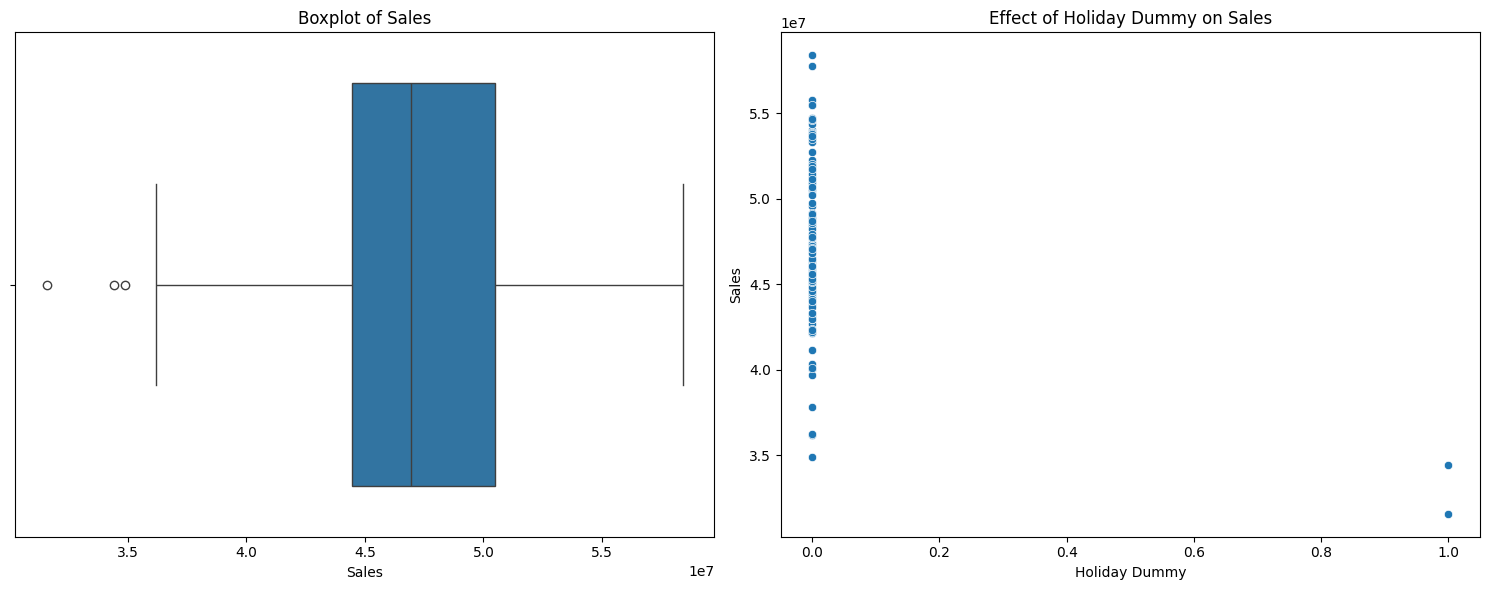

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

sns.boxplot(ax=axes[0], data=df, x='Sales')
axes[0].set_title('Boxplot of Sales')

sns.scatterplot(ax=axes[1], data=df, x='Holiday Dummy', y='Sales')
axes[1].set_title('Effect of Holiday Dummy on Sales')
axes[1].set_xlabel('Holiday Dummy')
axes[1].set_ylabel('Sales')

plt.tight_layout() 
plt.show()

In [95]:
from scipy.stats import ttest_ind
holiday_sales = df[df["Holiday Dummy"] == 1]["Sales"]
non_holiday_sales = df[df["Holiday Dummy"] == 0]["Sales"]
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales)
print(f"p-value: {p_value}") 

p-value: 2.1817053840020595e-05


### Creating interaction terms:

* Interaction terms are new variables created by multiplying two or more existing variables in a model.
* Without interaction terms, the model assumes the effect of Paid Social Spends is the same regardless of holidays.
  
* With interaction terms, the model can differentiate:
    * Effect of Paid Social Spends on non-holidays.
    * Effect of Paid Social Spends during holidays.

In [ ]:
df["Holiday Paid Social"] = df["Holiday Dummy"] * df["Paid Social Spends"]
df["Holiday Modular Video"] = df["Holiday Dummy"] * df["Modular Video Spends"]
df["Holiday Email"] = df["Holiday Dummy"] * df["Email Spends"]

In [56]:
outliers_sales = detect_outliers_iqr(df, "Modular Video Spends")
outliers_sales

# plt.figure(figsize=(10,6))
# sns.boxplot(data=df,x='Modular Video Spends')
# plt.title('Boxplot of Sales')

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
94,Brand A,2023-11-25,FY_2023,MAT_2024,3.158512e+07,0.039243,0.022613,1,26526125.5,1041.5930,18.396413,708057.0,60956.876043,1404945.5,37999692.5,2.670683e+06,69403666.5,9.555292e+05,0.0,0.0
108,Brand A,2024-03-02,FY_2024,MAT_2024,5.024674e+07,0.037500,0.147112,0,24589428.5,1007.8005,18.549949,316960.0,27287.197825,1929049.5,37405438.0,2.628918e+06,121916445.0,1.678510e+06,0.0,0.0


In [57]:
outliers_sales = detect_outliers_iqr(df, "Paid Search Spends")
outliers_sales

# plt.figure(figsize=(10,6))
# sns.boxplot(data=df,x='Paid Search Spends')
# plt.title('Boxplot of Sales')

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
0,Brand A,2022-02-05,FY_2022,MAT_2022,5.549708e+07,0.039253,0.015600,0,29882443.5,1070.8565,17.716258,534418.5,46008.276537,2662747.5,11599332.5,8.152210e+05,280464068.5,3.861346e+06,6779.5,671.943906
58,Brand A,2023-03-18,FY_2023,MAT_2023,5.145850e+07,0.069519,0.006896,0,26260678.5,1059.3555,18.197082,347179.0,29888.762159,1977867.5,19355808.5,1.360359e+06,315922684.0,4.349530e+06,7847.0,777.748186
59,Brand A,2023-03-25,FY_2023,MAT_2023,5.192829e+07,0.065680,0.008192,0,26164337.5,1059.3555,18.191690,289264.5,24902.882494,2011506.0,19133093.0,1.344707e+06,309477924.0,4.260801e+06,10363.5,1027.168769
60,Brand A,2023-04-01,FY_2023,MAT_2023,5.175812e+07,0.079329,0.008701,0,26326951.0,1059.3555,18.187050,251450.5,21647.461941,1941415.0,18968099.5,1.333111e+06,323869745.5,4.458943e+06,8571.5,849.556337


In [83]:
outliers_sales = detect_outliers_iqr(df, "Holiday Paid Social")
outliers_sales

# plt.figure(figsize=(10,6))
# sns.boxplot(data=df,x='Gasoline Price')
# plt.title('Boxplot of Sales')

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,...,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends,Holiday_PaidSocial,Holiday Paid Social
42,Brand A,2022-11-26,FY_2022,MAT_2023,3.444005e+07,0.049173,0.005968,1,29370250.0,1143.2715,...,107976.671165,2032915.5,11470452.0,8.061630e+05,207948002.5,2.862967e+06,1631.0,161.655065,2.862967e+06,2.862967e+06
94,Brand A,2023-11-25,FY_2023,MAT_2024,3.158512e+07,0.039243,0.022613,1,26526125.5,1041.5930,...,60956.876043,1404945.5,37999692.5,2.670683e+06,69403666.5,9.555292e+05,0.0,0.000000,9.555292e+05,9.555292e+05


# Exploratory Data Analysis

## Sales Time Series Trend & Seasonality

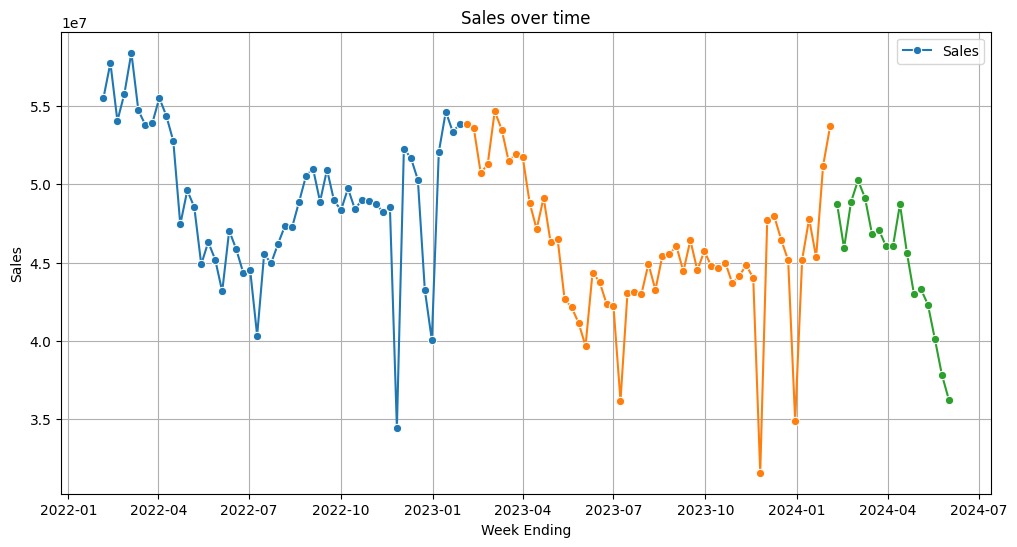

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Week_Ending',y='Sales',marker='o',color='blue',hue='Year')
plt.title('Sales over time')
plt.xlabel('Week Ending')
plt.ylabel('Sales')
plt.legend(['Sales'])
plt.grid(True)``

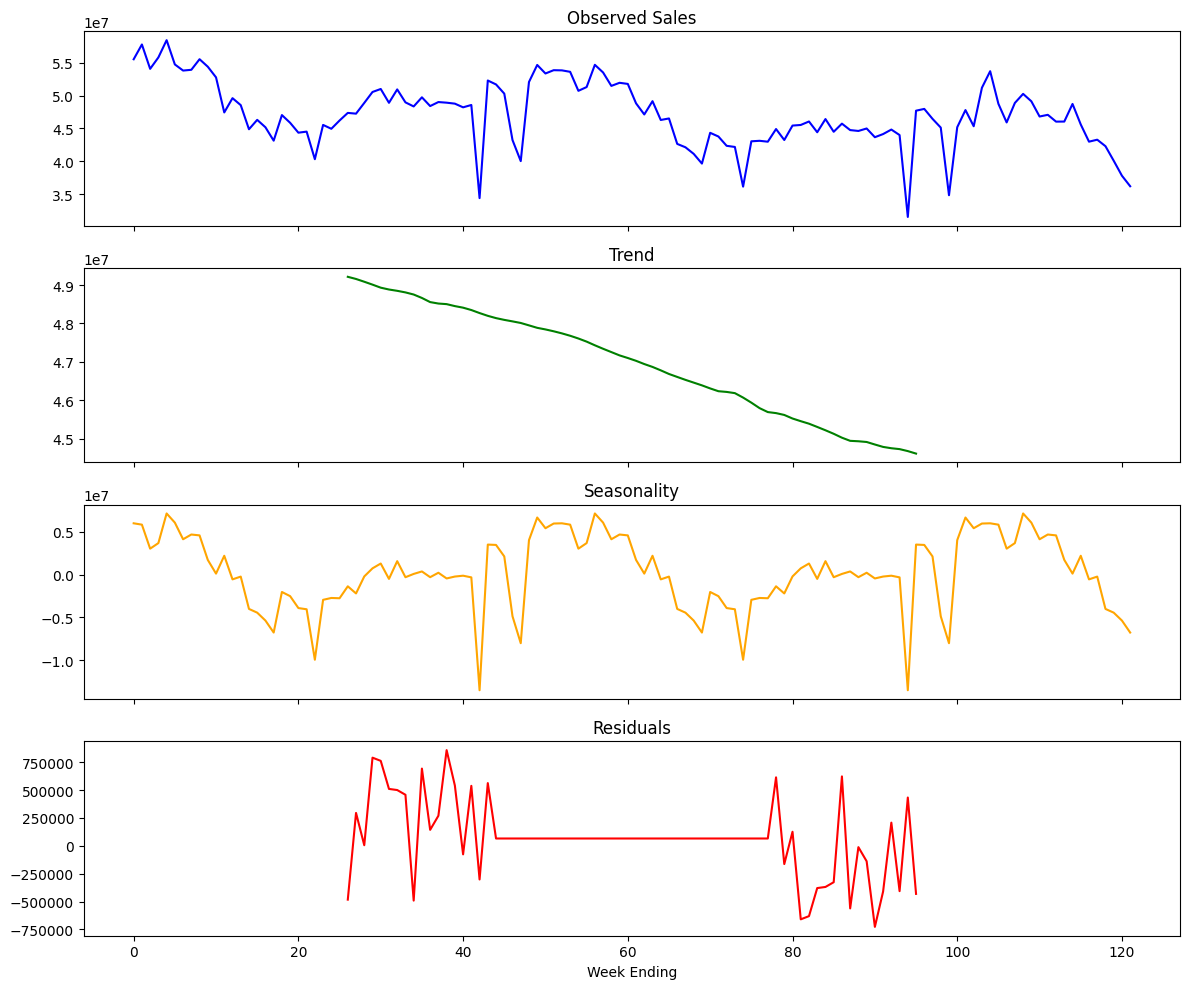

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

sales_decomposition = seasonal_decompose(df['Sales'],model='additive',period=25)

fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
sales_decomposition.observed.plot(ax=axes[0], title="Observed Sales", color="blue")
sales_decomposition.trend.plot(ax=axes[1], title="Trend", color="green")
sales_decomposition.seasonal.plot(ax=axes[2], title="Seasonality", color="orange")
sales_decomposition.resid.plot(ax=axes[3], title="Residuals", color="red")
plt.xlabel("Week Ending")
plt.tight_layout()
plt.show()